In [1]:
import psycopg2
import config
from sqlalchemy import create_engine
import getpass

In [2]:
# DB configuration
hostname = 'localhost'
database='Test'
username= 'postgres'
pwd= getpass.getpass()
port_id='5432'
conn_string = 'postgresql://{user}:{pwd}@{host}/{db}'.format(user=username,pwd=pwd,host=hostname,db=database)

········


In [3]:
db = create_engine(conn_string)
conn = db.connect()

In [23]:
def execute_query(query):

    conn = None
    try:
        conn = psycopg2.connect(conn_string)
        cur = conn.cursor()
        cur.execute(query)
        print("The number of records: ", cur.rowcount)
        row = cur.fetchone()

        while row is not None:
            print(row)
            row = cur.fetchone()

        cur.close()
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
    finally:
        if conn is not None:
            conn.close()

In [30]:
res = 'SELECT (time_signature - MIN(time_signature))/(MIN(time_signature) - MAX(time_signature)) from track_features limit 5'
execute_query(res)

column "track_features.time_signature" must appear in the GROUP BY clause or be used in an aggregate function
LINE 1: SELECT (time_signature - MIN(time_signature))/(MIN(time_sign...
                ^



In [4]:
conn.close()

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
track_features = pd.read_csv('../data/track_audio_features.csv',index_col=0)

In [4]:
track_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.482,0.721,0,-6.839,1,0.0321,0.731000,0.000000,0.1890,0.557,95.263,audio_features,3AhXZa8sUQht0UEdBJgpGc,spotify:track:3AhXZa8sUQht0UEdBJgpGc,https://api.spotify.com/v1/tracks/3AhXZa8sUQht...,https://api.spotify.com/v1/audio-analysis/3AhX...,369600,4
1,0.502,0.912,1,-4.556,1,0.0564,0.000025,0.000173,0.1060,0.720,116.761,audio_features,5ghIJDpPoe3CfHMGu71E6T,spotify:track:5ghIJDpPoe3CfHMGu71E6T,https://api.spotify.com/v1/tracks/5ghIJDpPoe3C...,https://api.spotify.com/v1/audio-analysis/5ghI...,301920,4
2,0.364,0.457,4,-14.162,0,0.0675,0.290000,0.000106,0.9220,0.175,163.219,audio_features,0hKRSZhUGEhKU6aNSPBACZ,spotify:track:0hKRSZhUGEhKU6aNSPBACZ,https://api.spotify.com/v1/tracks/0hKRSZhUGEhK...,https://api.spotify.com/v1/audio-analysis/0hKR...,337413,4
3,0.398,0.413,1,-10.934,1,0.0388,0.082200,0.000025,0.0891,0.331,133.574,audio_features,5Qt4Cc66g24QWwGP3YYV9y,spotify:track:5Qt4Cc66g24QWwGP3YYV9y,https://api.spotify.com/v1/tracks/5Qt4Cc66g24Q...,https://api.spotify.com/v1/audio-analysis/5Qt4...,219147,4
4,0.534,0.803,10,-9.129,1,0.0743,0.741000,0.000061,0.3070,0.969,167.983,audio_features,2QfiRTz5Yc8DdShCxG1tB2,spotify:track:2QfiRTz5Yc8DdShCxG1tB2,https://api.spotify.com/v1/tracks/2QfiRTz5Yc8D...,https://api.spotify.com/v1/audio-analysis/2Qfi...,161560,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9942,0.332,0.707,7,-12.698,1,0.0361,0.000012,0.006120,0.1100,0.652,144.815,audio_features,2QSD3K3b3BJ8DPhGhQfDPW,spotify:track:2QSD3K3b3BJ8DPhGhQfDPW,https://api.spotify.com/v1/tracks/2QSD3K3b3BJ8...,https://api.spotify.com/v1/audio-analysis/2QSD...,199467,4
9943,0.697,0.687,6,-11.111,1,0.3790,0.260000,0.000048,0.4030,0.866,90.247,audio_features,67mtN6BlsJR0LVyzvNZnGt,spotify:track:67mtN6BlsJR0LVyzvNZnGt,https://api.spotify.com/v1/tracks/67mtN6BlsJR0...,https://api.spotify.com/v1/audio-analysis/67mt...,201373,4
9944,0.688,0.710,2,-9.793,1,0.3430,0.528000,0.001360,0.0697,0.414,119.961,audio_features,1KcxkWlRSDNchLovHnHBKP,spotify:track:1KcxkWlRSDNchLovHnHBKP,https://api.spotify.com/v1/tracks/1KcxkWlRSDNc...,https://api.spotify.com/v1/audio-analysis/1Kcx...,183040,4
9945,0.313,0.690,1,-13.365,1,0.0326,0.000356,0.005160,0.1260,0.831,148.979,audio_features,3h66NhIvR5cgi2xJlUUmgd,spotify:track:3h66NhIvR5cgi2xJlUUmgd,https://api.spotify.com/v1/tracks/3h66NhIvR5cg...,https://api.spotify.com/v1/audio-analysis/3h66...,221000,4


In [6]:
track_features.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000,9.947000e+03,9947.000000
mean,0.564909,0.616352,5.260782,-9.229920,0.706042,0.071065,0.308176,0.106218,0.190163,0.576387,121.364291,2.517101e+05,3.922087
std,0.167304,0.233826,3.531814,3.867442,0.455596,0.075259,0.324733,0.239262,0.154483,0.246310,28.005650,1.189435e+05,0.351467
min,0.000000,0.000020,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.012000,0.000000,0.000000,4.516000e+04,0.000000
25%,0.449000,0.450000,2.000000,-11.630500,0.000000,0.033600,0.023700,0.000002,0.091950,0.382000,100.573000,1.844670e+05,4.000000
50%,0.569000,0.648000,5.000000,-8.724000,1.000000,0.043200,0.168000,0.000328,0.129000,0.591000,120.022000,2.283600e+05,4.000000
75%,0.685000,0.808000,9.000000,-6.323500,1.000000,0.070350,0.570500,0.030150,0.246000,0.781000,137.228500,2.849935e+05,4.000000
max,0.988000,0.997000,11.000000,1.342000,1.000000,0.944000,0.996000,0.993000,0.993000,0.989000,217.588000,2.516987e+06,5.000000


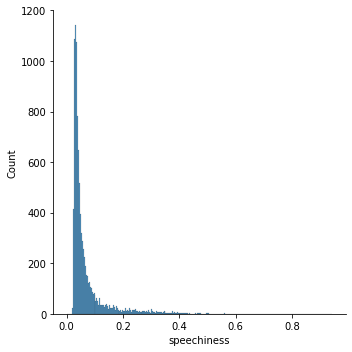

In [93]:
y = 'speechiness'
sns.displot(track_features,x=y)

In [25]:
# speechiness -> skewed to the right
# energy -> skewed to the left
# acousticness -> bimodal
# instrumentalness - > very high variance
# liveness -> skewed to right
# valence -> somewhat uniform
# tempo -> multimodal normal

In [30]:
track_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9947 entries, 0 to 9946
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      9947 non-null   float64
 1   energy            9947 non-null   float64
 2   key               9947 non-null   int64  
 3   loudness          9947 non-null   float64
 4   mode              9947 non-null   int64  
 5   speechiness       9947 non-null   float64
 6   acousticness      9947 non-null   float64
 7   instrumentalness  9947 non-null   float64
 8   liveness          9947 non-null   float64
 9   valence           9947 non-null   float64
 10  tempo             9947 non-null   float64
 11  type              9947 non-null   object 
 12  id                9947 non-null   object 
 13  uri               9947 non-null   object 
 14  track_href        9947 non-null   object 
 15  analysis_url      9947 non-null   object 
 16  duration_ms       9947 non-null   int64  


C:\Users\vatss\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


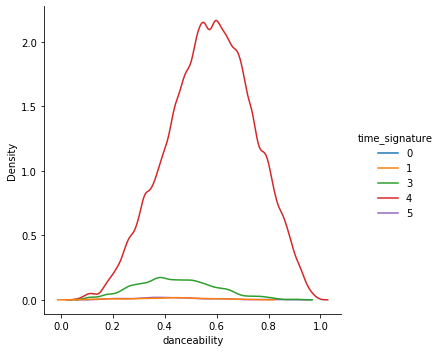

In [41]:
# time sig, mode ,key
sns.displot(track_features,x='danceability',hue='time_signature',kind='kde',bw_adjust=.5, palette='tab10')

C:\Users\vatss\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


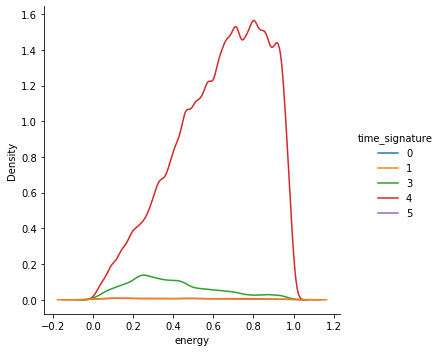

In [42]:
sns.displot(track_features,x='energy',hue='time_signature',kind='kde',bw_adjust=.5, palette='tab10')

C:\Users\vatss\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


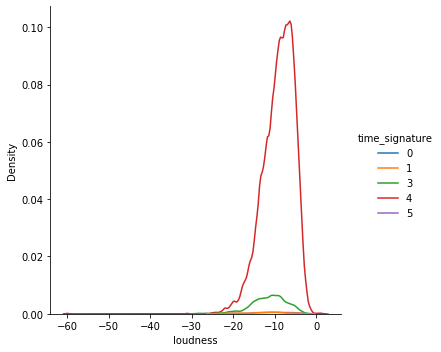

In [43]:
sns.displot(track_features,x='loudness',hue='time_signature',kind='kde',bw_adjust=.5, palette='tab10')

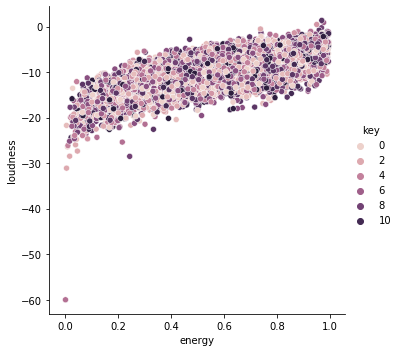

In [60]:
sns.relplot(data=track_features,x='energy',y='loudness',hue='key')

In [46]:
track_features.key.value_counts()

7     1255
9     1208
0     1204
2     1113
4      864
5      863
1      795
11     700
10     607
6      522
8      506
3      310
Name: key, dtype: int64

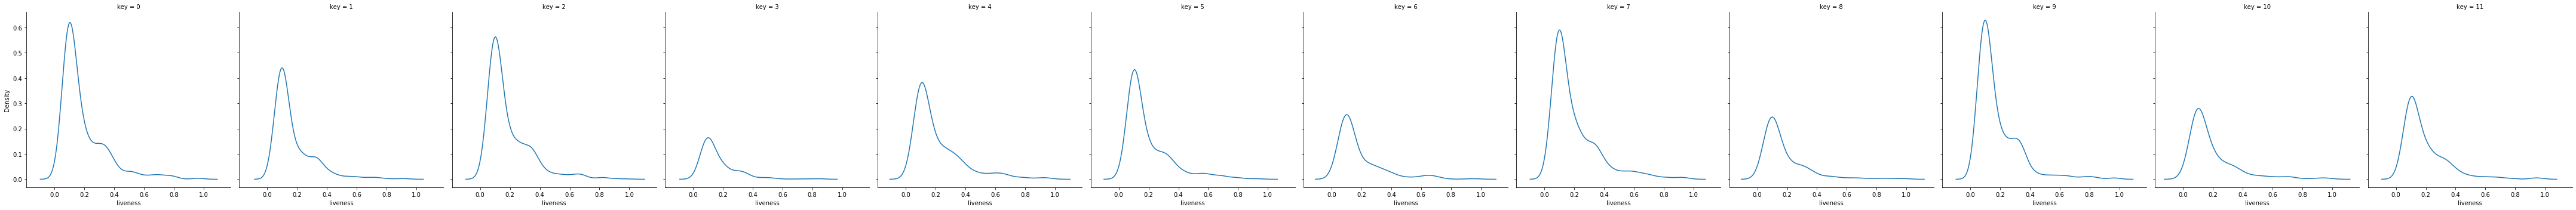

In [74]:
sns.displot(data=track_features,x='liveness',col='key',kind='kde',palette='tab10')

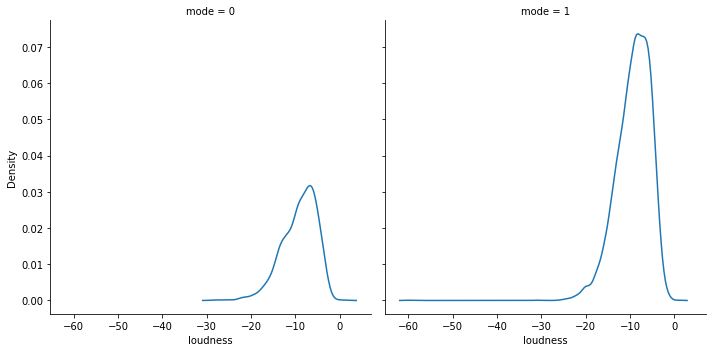

In [88]:
sns.displot(data=track_features,x='loudness',col='mode',kind='kde',palette='tab10')

In [3]:
def speechiness_bins(row):
    if row > 0.66:
        return 2
    if row >0.33 and row<= 0.66:
        return 1
    else:
        return 0
track_features['speechiness_binned'] = track_features['speechiness'].apply(speechiness_bins)

In [4]:
track_features['speechiness_binned'].value_counts()

0    9729
1     213
2       5
Name: speechiness_binned, dtype: int64

In [95]:
sum(track_features['speechiness']<0.2)

9283

In [5]:
def danceability_bins(row):
    if row > 0.66:
        return 2
    elif row >0.33 and row<= 0.66:
        return 1
    else:
        return 0
track_features['danceability_binned'] = track_features['danceability'].apply(danceability_bins)

In [6]:
def instrumentalness_binned(row):
    if row > 0.66:
        return 2
    elif row >0.33 and row<= 0.66:
        return 1
    else:
        return 0
track_features['instrumentalness_binned'] = track_features['instrumentalness'].apply(instrumentalness_binned)

In [8]:
track_features.to_csv('../viz_data/tracks_feature_df.csv')

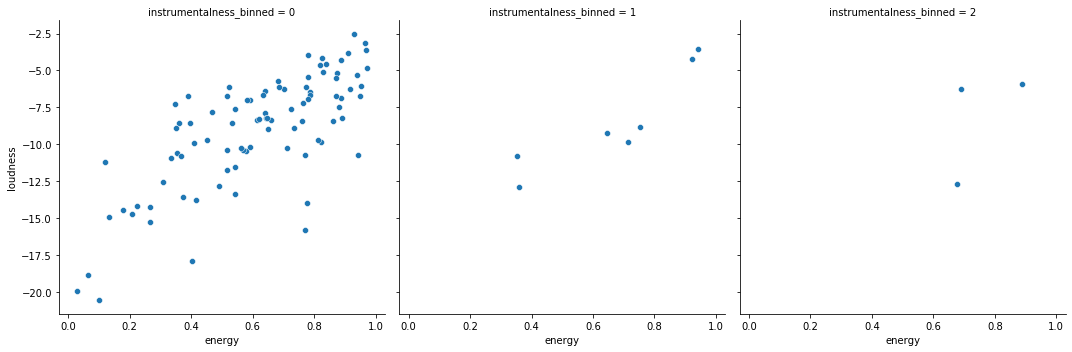

In [102]:
sns.relplot(data=track_features.sample(n=100),x='energy',y='loudness',col='instrumentalness_binned')

In [103]:
track_features['instrumentalness_binned'].value_counts()

0    8673
2     747
1     527
Name: instrumentalness_binned, dtype: int64

In [108]:
track_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,speechiness_binned,danceability_binned,instrumentalness_binned
0,0.482,0.721,0,-6.839,1,0.0321,0.731000,0.000000,0.1890,0.557,...,audio_features,3AhXZa8sUQht0UEdBJgpGc,spotify:track:3AhXZa8sUQht0UEdBJgpGc,https://api.spotify.com/v1/tracks/3AhXZa8sUQht...,https://api.spotify.com/v1/audio-analysis/3AhX...,369600,4,0,1,0
1,0.502,0.912,1,-4.556,1,0.0564,0.000025,0.000173,0.1060,0.720,...,audio_features,5ghIJDpPoe3CfHMGu71E6T,spotify:track:5ghIJDpPoe3CfHMGu71E6T,https://api.spotify.com/v1/tracks/5ghIJDpPoe3C...,https://api.spotify.com/v1/audio-analysis/5ghI...,301920,4,0,1,0
2,0.364,0.457,4,-14.162,0,0.0675,0.290000,0.000106,0.9220,0.175,...,audio_features,0hKRSZhUGEhKU6aNSPBACZ,spotify:track:0hKRSZhUGEhKU6aNSPBACZ,https://api.spotify.com/v1/tracks/0hKRSZhUGEhK...,https://api.spotify.com/v1/audio-analysis/0hKR...,337413,4,0,1,0
3,0.398,0.413,1,-10.934,1,0.0388,0.082200,0.000025,0.0891,0.331,...,audio_features,5Qt4Cc66g24QWwGP3YYV9y,spotify:track:5Qt4Cc66g24QWwGP3YYV9y,https://api.spotify.com/v1/tracks/5Qt4Cc66g24Q...,https://api.spotify.com/v1/audio-analysis/5Qt4...,219147,4,0,1,0
4,0.534,0.803,10,-9.129,1,0.0743,0.741000,0.000061,0.3070,0.969,...,audio_features,2QfiRTz5Yc8DdShCxG1tB2,spotify:track:2QfiRTz5Yc8DdShCxG1tB2,https://api.spotify.com/v1/tracks/2QfiRTz5Yc8D...,https://api.spotify.com/v1/audio-analysis/2Qfi...,161560,4,0,1,0


In [110]:
track_features.drop(columns=['track_href','analysis_url','id','uri','type'])

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,speechiness_binned,danceability_binned,instrumentalness_binned
0,0.482,0.721,0,-6.839,1,0.0321,0.731000,0.000000,0.1890,0.557,95.263,369600,4,0,1,0
1,0.502,0.912,1,-4.556,1,0.0564,0.000025,0.000173,0.1060,0.720,116.761,301920,4,0,1,0
2,0.364,0.457,4,-14.162,0,0.0675,0.290000,0.000106,0.9220,0.175,163.219,337413,4,0,1,0
3,0.398,0.413,1,-10.934,1,0.0388,0.082200,0.000025,0.0891,0.331,133.574,219147,4,0,1,0
4,0.534,0.803,10,-9.129,1,0.0743,0.741000,0.000061,0.3070,0.969,167.983,161560,4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9942,0.332,0.707,7,-12.698,1,0.0361,0.000012,0.006120,0.1100,0.652,144.815,199467,4,0,1,0
9943,0.697,0.687,6,-11.111,1,0.3790,0.260000,0.000048,0.4030,0.866,90.247,201373,4,1,2,0
9944,0.688,0.710,2,-9.793,1,0.3430,0.528000,0.001360,0.0697,0.414,119.961,183040,4,1,2,0
9945,0.313,0.690,1,-13.365,1,0.0326,0.000356,0.005160,0.1260,0.831,148.979,221000,4,0,0,0


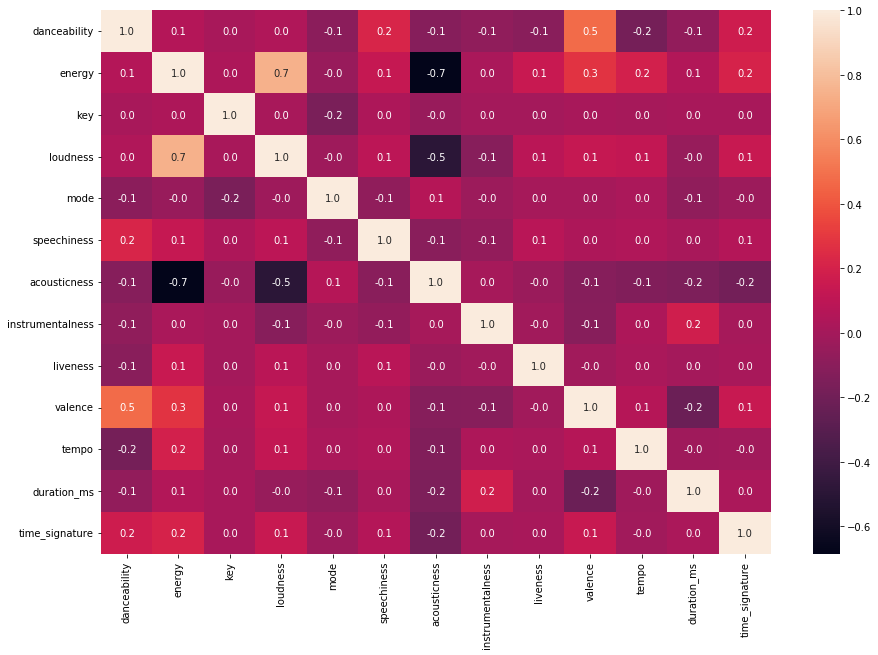

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(track_features.drop(columns=['track_href','analysis_url','id','uri','type']).corr(),annot=True,fmt=".1f")

In [24]:
grouped_danceability = track_features.groupby('danceability_binned').apply(lambda x: x.sample(900))

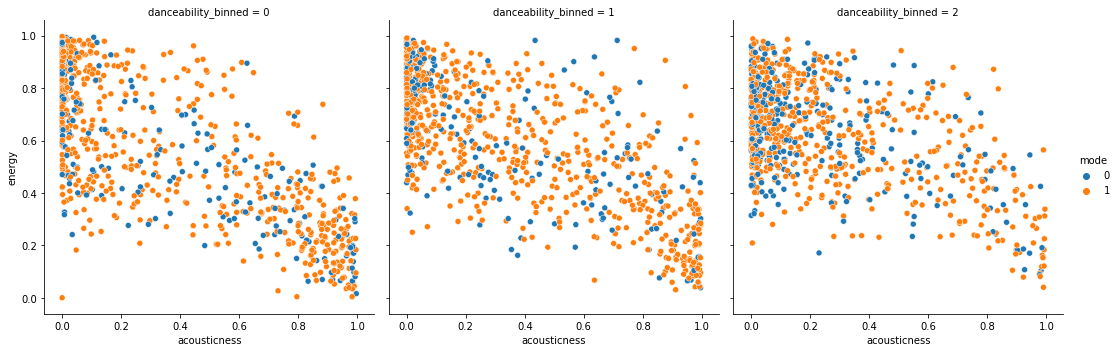

In [21]:
sns.relplot(data=grouped_danceability,x='acousticness',y='energy',hue="mode",col="danceability_binned")

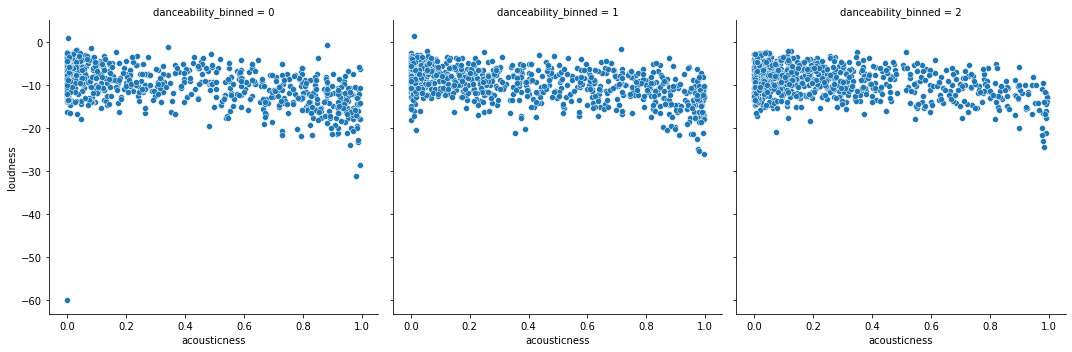

In [22]:
sns.relplot(data=grouped_danceability,x='acousticness',y='loudness',col='danceability_binned')

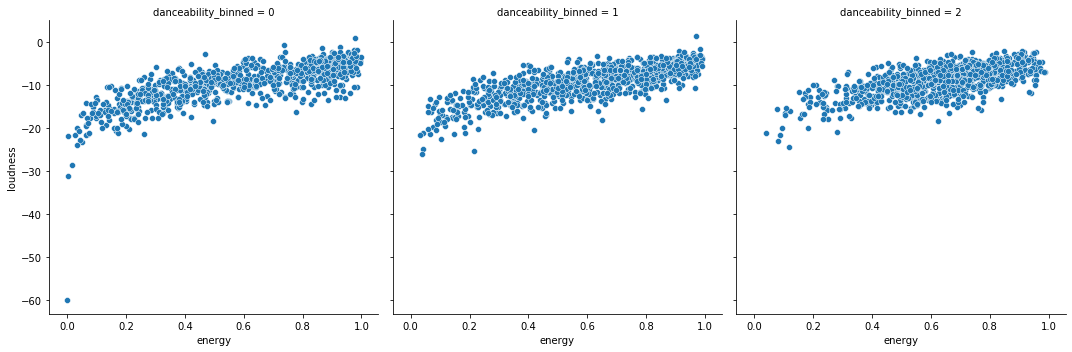

In [23]:
sns.relplot(data=grouped_danceability,x='energy',y='loudness',col='danceability_binned')

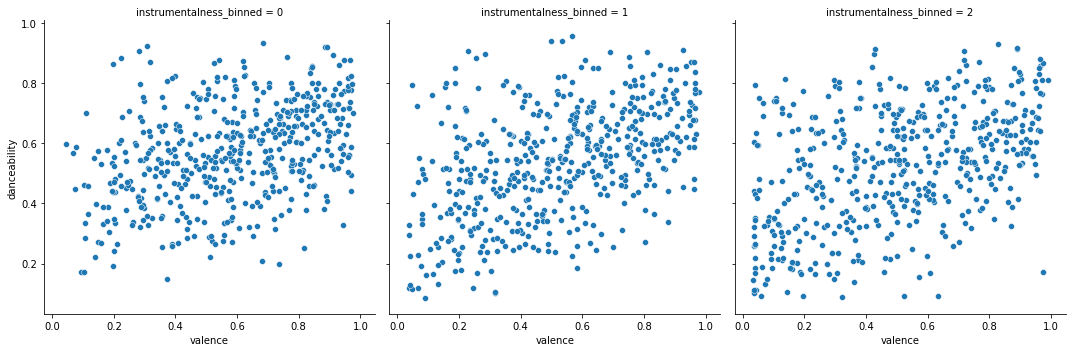

In [27]:
grouped_instrumentalness = track_features.groupby('instrumentalness_binned').apply(lambda x: x.sample(500))
sns.relplot(data=grouped_instrumentalness,x='valence',y='danceability',col="instrumentalness_binned")

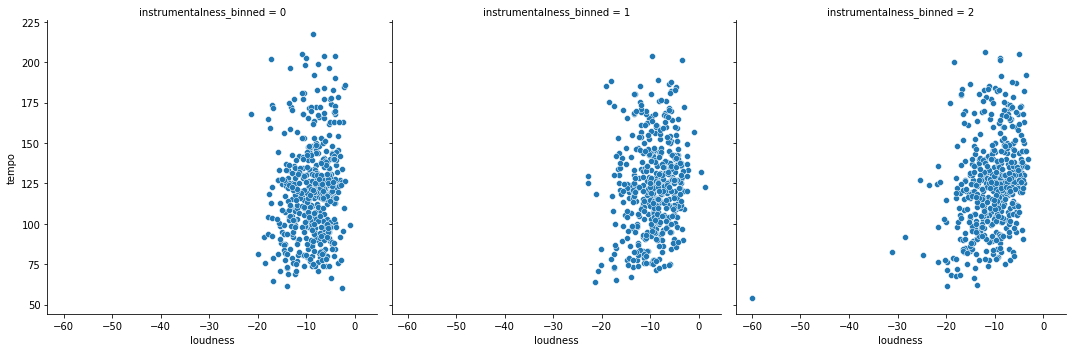

In [29]:
sns.relplot(data=grouped_instrumentalness,x='loudness',y='tempo',col='instrumentalness_binned')

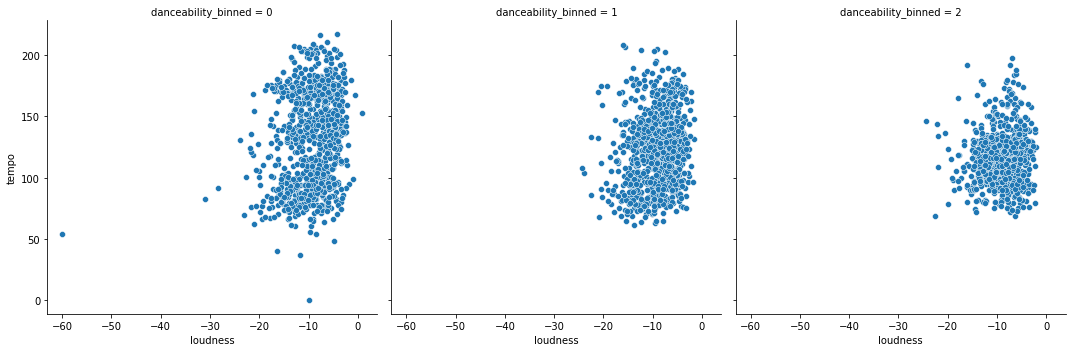

In [30]:
sns.relplot(data=grouped_danceability,x='loudness',y='tempo',col='danceability_binned')